# Investigation of Saudi Arabia COVID-19 Cases (Mar 2020 - Oct 2021)

Recently, there has been a huge interest in pandemic COVID-19 studies due that led to major global disruptions. In this investigation I will focus on Saudi Arabia COVID-19 Cases. 
 
## 1. Data Collection 
##### - Questions
- Are the different seasons and events (Summer, Winter, holidays, Eids...) affect the number of COVID-19 cases?
- Do the numbers of COVID-19 cases differ between big/main cities and small cities?
- What is the expected date of reaching zero cases?
- Is the COVID-19 cases indicators expected to rise again after returning back to school ( at 31 Oct 2021)?

##### - Type of Data
Time series data that obtained from The King Abdullah Petroleum Studies and Research Center in CSV format. The dataset include a sequence of data points (COVID-19 cases) indexed in time order from 2 Mar 2020 to 1 Oct 2021. It consists of 428346 row، related to 207 cities in Saudi Arabia. Additionally, it include fetures such:

- Number of Cases (Daily / Cumulative)
- Case Indicators (Active, Mortalities, Critical ...)
- Number of Cases
- Date & Days
- Events
- City & Region

##### - Sources
- https://datasource.kapsarc.org/explore/dataset/saudi-arabia-coronavirus-disease-covid-19-situation/export/?disjunctive.daily_cumulative&disjunctive.indicator&disjunctive.event&disjunctive.city_en&disjunctive.region_en

- https://covid19.moh.gov.sa/
 


## 2.  Exploratory Data Analysis (EDA)
This section shows:
- Distinguishes Attributes
- Detect Outliers and Missing Values
- Features Engineering 
- Features analysis (Uni/multivariate) 
### a. Distinguishes Attributes

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
#load the dataset
dataset = "dataset_covied19.csv"
df = pd.read_csv(dataset, error_bad_lines=False, sep=';')

In [4]:
df

,Daily / Cumulative,Indicator,Date,Event,City,Region,Cases (person)
0,Cumulative,Cases,2020-11-05,NaN,Al Khubar,Eastern Region,7265
1,Cumulative,Cases,2020-11-05,NaN,Jeddah,Makkah Al Mukarramah,33808
2,Cumulative,Cases,2020-11-05,NaN,Ar Riyad,Ar Riyad,57841
3,Cumulative,Cases,2020-11-05,NaN,Ad Duwadimi,Ar Riyad,464
4,Cumulative,Cases,2020-10-28,NaN,Rabigh,Makkah Al Mukarramah,272
...,...,...,...,...,...,...,...
428341,Cumulative,Active,2021-07-01,NaN,Al Lith,Makkah Al Mukarramah,132
428342,Cumulative,Active,2021-07-01,NaN,Badr,Al Madinah Al Munawwarah,76
428343,Cumulative,Active,2021-06-30,NaN,Haql,Tabuk,7
428344,Cumulative,Active,2021-07-01,NaN,Tabarjal,Al Jawf,8


In [5]:
df.shape

(428346, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428346 entries, 0 to 428345
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Daily / Cumulative  428346 non-null  object
 1   Indicator           428346 non-null  object
 2   Date                428346 non-null  object
 3   Event               1900 non-null    object
 4   City                428346 non-null  object
 5   Region              428346 non-null  object
 6   Cases (person)      428346 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 22.9+ MB


NOTE: <br>
    - "Date" need to change type <br>
    - "Event" has NaN valued <br>
    - "Cases (person)" better to change the column name (which is the target value)

In [7]:
df.Indicator.value_counts()

Cases          145405
Recoveries     140960
Active          94333
Mortalities     45972
Tested           1158
Critical          518
Name: Indicator, dtype: int64

NOTE: <br>
    - "Cases" is duplicated values <br>
    - "Tested" Consider as an outlier 

In [8]:
df.City.value_counts()

Total                   5655
Jeddah                  3857
Makkah Al Mukarramah    3788
Ar Riyad                3759
Ad Dammam               3622
                        ... 
Hadda                    154
Al Hadban                 93
Abu 'Urwah                72
As Sulaymaniyyah          26
Harad                     26
Name: City, Length: 207, dtype: int64

In [9]:
df.Region.value_counts()

Ar Riyad                    70517
Eastern Region              60172
Makkah Al Mukarramah        54090
Aseer                       51448
Jazan                       39088
Al Qaseem                   31495
Al Madinah Al Munawwarah    22057
Al Bahah                    17973
Hail                        17157
Tabuk                       17153
Al Jawf                     14882
Najran                      14319
Northern Borders            12340
Total                        5655
Name: Region, dtype: int64

NOTE: <br>
    - "Total" is duplicated values in 'Region' & 'City'  <br>

In [10]:
print('Tha dataset consists information about', df.City.nunique()-1, 'cities  arround Saudi Arabia for ', df.Region.nunique()-1, 'regions.')

Tha dataset consists information about 206 cities  arround Saudi Arabia for  13 regions.


In [11]:
df.Event.value_counts()

Curfew lifted(all regions)                                                        939
Partial lifting of curfew in all cities except Makkah                             179
Jeddah areas lockdown - 24 h curfew                                               173
Makkah lockdown                                                                   136
Riyadh, Dammam , Tabuk , Dahran, Hafuf, Jeddah, Taif, Qatif , Khobar24h curfew    115
Jeddah lockdown                                                                    80
Makkah , Madinah 24 hours curfew                                                   79
Riyadh, Makkah and Madinah lockdown - curfew (6am - 3pm)                           70
Domestic flights suspension                                                        40
Gov / private suspension                                                           31
International flights suspension for 14 days                                       27
Umrah suspension                                      

NOTE: <br>
    - A first look at the "Event" column indicates that it has less important

In [12]:
df['Daily / Cumulative'].value_counts()

Cumulative    333140
Daily          95206
Name: Daily / Cumulative, dtype: int64

Before doing any Pre-Processing, I will do more discover about 'Daily / Cumulative' column in order to decide what should be informative for the study.

In [13]:
Cases_Indicator = df[df["Indicator"] == 'Cases']
Cases_Indicator

,Daily / Cumulative,Indicator,Date,Event,City,Region,Cases (person)
0,Cumulative,Cases,2020-11-05,NaN,Al Khubar,Eastern Region,7265
1,Cumulative,Cases,2020-11-05,NaN,Jeddah,Makkah Al Mukarramah,33808
2,Cumulative,Cases,2020-11-05,NaN,Ar Riyad,Ar Riyad,57841
3,Cumulative,Cases,2020-11-05,NaN,Ad Duwadimi,Ar Riyad,464
4,Cumulative,Cases,2020-10-28,NaN,Rabigh,Makkah Al Mukarramah,272
...,...,...,...,...,...,...,...
404845,Cumulative,Cases,2020-12-13,NaN,Thar,Najran,39
404846,Cumulative,Cases,2020-12-31,NaN,Thar,Najran,39
404847,Cumulative,Cases,2021-01-18,NaN,Thar,Najran,39
404848,Cumulative,Cases,2021-01-19,NaN,Thar,Najran,39


In [14]:
Cases_Indicator['Daily / Cumulative'].value_counts()

Cumulative    100188
Daily          45217
Name: Daily / Cumulative, dtype: int64

In [15]:
Cumulative_df = df[df["Daily / Cumulative"] == 'Cumulative']
Cumulative_df

,Daily / Cumulative,Indicator,Date,Event,City,Region,Cases (person)
0,Cumulative,Cases,2020-11-05,NaN,Al Khubar,Eastern Region,7265
1,Cumulative,Cases,2020-11-05,NaN,Jeddah,Makkah Al Mukarramah,33808
2,Cumulative,Cases,2020-11-05,NaN,Ar Riyad,Ar Riyad,57841
3,Cumulative,Cases,2020-11-05,NaN,Ad Duwadimi,Ar Riyad,464
4,Cumulative,Cases,2020-10-28,NaN,Rabigh,Makkah Al Mukarramah,272
...,...,...,...,...,...,...,...
428341,Cumulative,Active,2021-07-01,NaN,Al Lith,Makkah Al Mukarramah,132
428342,Cumulative,Active,2021-07-01,NaN,Badr,Al Madinah Al Munawwarah,76
428343,Cumulative,Active,2021-06-30,NaN,Haql,Tabuk,7
428344,Cumulative,Active,2021-07-01,NaN,Tabarjal,Al Jawf,8


In [16]:
df1["Daily / Cumulative"].value_counts()

NameError: name 'df1' is not defined

In [17]:
Daily_df = df[df["Daily / Cumulative"] == 'Daily']
Daily_df

,Daily / Cumulative,Indicator,Date,Event,City,Region,Cases (person)
4053,Daily,Cases,2021-07-31,NaN,ʻUrayʻIrah,Eastern Region,2
4054,Daily,Cases,2021-07-31,NaN,ʻUqlat As Suqur,Al Qaseem,4
4055,Daily,Cases,2021-07-31,NaN,Makkah Al Mukarramah,Makkah Al Mukarramah,28
4056,Daily,Cases,2021-07-31,NaN,Najran,Najran,29
4057,Daily,Cases,2021-07-31,NaN,Hubuna,Najran,3
...,...,...,...,...,...,...,...
423322,Daily,Mortalities,2021-05-15,NaN,Al Madinah Al Munawwarah,Al Madinah Al Munawwarah,1
423323,Daily,Mortalities,2021-05-16,NaN,Khamis Mushayt,Aseer,1
423324,Daily,Mortalities,2021-05-16,NaN,Jeddah,Makkah Al Mukarramah,1
423325,Daily,Mortalities,2021-05-16,NaN,Al Qunfudhah,Makkah Al Mukarramah,1


In [18]:
Daily_df['City'].value_counts()

Total                   2274
Jeddah                  1605
Makkah Al Mukarramah    1530
Ar Riyad                1502
Ad Dammam               1366
                        ... 
Abu 'Urwah                 5
Samudah                    4
As Sulaymaniyyah           2
Harad                      2
Hadad Bani Malik           2
Name: City, Length: 207, dtype: int64

In [19]:
Cumulative_df['City'].value_counts()

Total                   3381
Al Qatif                2265
Makkah Al Mukarramah    2258
Ar Riyad                2257
Ad Dammam               2256
                        ... 
Hadda                    125
Al Hadban                 86
Abu 'Urwah                67
As Sulaymaniyyah          24
Harad                     24
Name: City, Length: 207, dtype: int64

In [20]:
Daily_df['Region'].value_counts()

Eastern Region              15825
Ar Riyad                    15215
Makkah Al Mukarramah        12044
Aseer                       11025
Al Qaseem                    7780
Jazan                        7557
Al Madinah Al Munawwarah     5640
Al Bahah                     3541
Najran                       3221
Hail                         3219
Tabuk                        3133
Al Jawf                      2432
Northern Borders             2300
Total                        2274
Name: Region, dtype: int64

In [21]:
Cumulative_df['Region'].value_counts()

Ar Riyad                    55302
Eastern Region              44347
Makkah Al Mukarramah        42046
Aseer                       40423
Jazan                       31531
Al Qaseem                   23715
Al Madinah Al Munawwarah    16417
Al Bahah                    14432
Tabuk                       14020
Hail                        13938
Al Jawf                     12450
Najran                      11098
Northern Borders            10040
Total                        3381
Name: Region, dtype: int64

In [22]:
Daily_df['Indicator'].value_counts()

Cases          45217
Recoveries     44034
Mortalities     5376
Tested           579
Name: Indicator, dtype: int64

In [23]:
Cumulative_df['Indicator'].value_counts()

Cases          100188
Recoveries      96926
Active          94333
Mortalities     40596
Tested            579
Critical          518
Name: Indicator, dtype: int64

In [24]:
Cumulative_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333140 entries, 0 to 428345
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Daily / Cumulative  333140 non-null  object
 1   Indicator           333140 non-null  object
 2   Date                333140 non-null  object
 3   Event               1414 non-null    object
 4   City                333140 non-null  object
 5   Region              333140 non-null  object
 6   Cases (person)      333140 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 20.3+ MB


NOTE : <br>
    - "Daily / Cumulative" have a duplicated data, so I decide to use only a daily cases wich is more informative 
    

### b. Detect Outliers and Missing Values

In [25]:
#(1)Filling the NaN values in 'Event'
df1 = df.fillna({'Event':'No event'})

In [26]:
#(2) Handel rows that have "Total" value in 'Region' and 'city' columns

df1.drop(df1.loc[df1['Region']=='Total'].index, inplace=True)
df1.drop(df1.loc[df1['City']=='Total'].index, inplace=True)

In [27]:
#(3) Handel rows that have "Tested" value in 'Indicator' column
df1.drop(df1.loc[df1['Indicator']=='Tested'].index, inplace=True)
df1.drop(df1.loc[df1['Indicator']=='Cases'].index, inplace=True)

In [28]:
#(4) Extrat the 'Daily / Cumulative' cases
df1.drop(df1.loc[df1['Daily / Cumulative']=='Cumulative'].index, inplace=True)

In [29]:
df1

,Daily / Cumulative,Indicator,Date,Event,City,Region,Cases (person)
25397,Daily,Recoveries,2020-03-27,No event,Ar Riyad,Ar Riyad,2
25398,Daily,Recoveries,2020-03-28,No event,Ar Riyad,Ar Riyad,2
25399,Daily,Recoveries,2020-03-29,Jeddah lockdown,Makkah Al Mukarramah,Makkah Al Mukarramah,25
25400,Daily,Recoveries,2020-03-31,No event,Al Qatif,Eastern Region,1
25401,Daily,Recoveries,2020-03-31,No event,Jeddah,Makkah Al Mukarramah,28
...,...,...,...,...,...,...,...
423322,Daily,Mortalities,2021-05-15,No event,Al Madinah Al Munawwarah,Al Madinah Al Munawwarah,1
423323,Daily,Mortalities,2021-05-16,No event,Khamis Mushayt,Aseer,1
423324,Daily,Mortalities,2021-05-16,No event,Jeddah,Makkah Al Mukarramah,1
423325,Daily,Mortalities,2021-05-16,No event,Al Qunfudhah,Makkah Al Mukarramah,1


In [30]:
print ('Shape of dataset befor handling',df.shape)
print ('Shape of dataset After handling',df1.shape)

Shape of dataset befor handling (428346, 7)
Shape of dataset After handling (48292, 7)


### c. Feature Engineering 


In [31]:
#(1) Convert 'Data' type
df1['Date'] = pd.to_datetime(df1['Date'])

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48292 entries, 25397 to 423326
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Daily / Cumulative  48292 non-null  object        
 1   Indicator           48292 non-null  object        
 2   Date                48292 non-null  datetime64[ns]
 3   Event               48292 non-null  object        
 4   City                48292 non-null  object        
 5   Region              48292 non-null  object        
 6   Cases (person)      48292 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 2.9+ MB


In [33]:
#(2) Add 'Day_name' column
df1['Day_name'] = df1['Date'].dt.day_name() 

In [34]:
#(3) Add 'Day','year' and 'month' column
df1['Day'] = df1['Date'].dt.day
df1['Month'] = df1['Date'].dt.month
df1['Year'] = df1['Date'].dt.year

In [35]:
#(4) Rename 'Cases (person)' column
df1 = df1.rename(columns = {'Cases (person)':'Cases'}, inplace = False)

In [36]:
#(5)Rearrange Features
df1 = df1 [["Date","Day_name","Day","Month","Year","Cases","City","Region","Indicator","Event","Daily / Cumulative"]]
df1

,Date,Day_name,Day,Month,Year,Cases,City,Region,Indicator,Event,Daily / Cumulative
25397,2020-03-27,Friday,27,3,2020,2,Ar Riyad,Ar Riyad,Recoveries,No event,Daily
25398,2020-03-28,Saturday,28,3,2020,2,Ar Riyad,Ar Riyad,Recoveries,No event,Daily
25399,2020-03-29,Sunday,29,3,2020,25,Makkah Al Mukarramah,Makkah Al Mukarramah,Recoveries,Jeddah lockdown,Daily
25400,2020-03-31,Tuesday,31,3,2020,1,Al Qatif,Eastern Region,Recoveries,No event,Daily
25401,2020-03-31,Tuesday,31,3,2020,28,Jeddah,Makkah Al Mukarramah,Recoveries,No event,Daily
...,...,...,...,...,...,...,...,...,...,...,...
423322,2021-05-15,Saturday,15,5,2021,1,Al Madinah Al Munawwarah,Al Madinah Al Munawwarah,Mortalities,No event,Daily
423323,2021-05-16,Sunday,16,5,2021,1,Khamis Mushayt,Aseer,Mortalities,No event,Daily
423324,2021-05-16,Sunday,16,5,2021,1,Jeddah,Makkah Al Mukarramah,Mortalities,No event,Daily
423325,2021-05-16,Sunday,16,5,2021,1,Al Qunfudhah,Makkah Al Mukarramah,Mortalities,No event,Daily


In [ ]:
#(6) drop un-needed column from df_dailey

df1.drop(df1.columns[[10]], axis = 1,inplace=True)


In [45]:
df1

,Date,Day_name,Day,Month,Year,Cases,City,Region,Indicator,Event
25397,2020-03-27,Friday,27,3,2020,2,Ar Riyad,Ar Riyad,Recoveries,No event
25398,2020-03-28,Saturday,28,3,2020,2,Ar Riyad,Ar Riyad,Recoveries,No event
25399,2020-03-29,Sunday,29,3,2020,25,Makkah Al Mukarramah,Makkah Al Mukarramah,Recoveries,Jeddah lockdown
25400,2020-03-31,Tuesday,31,3,2020,1,Al Qatif,Eastern Region,Recoveries,No event
25401,2020-03-31,Tuesday,31,3,2020,28,Jeddah,Makkah Al Mukarramah,Recoveries,No event
...,...,...,...,...,...,...,...,...,...,...
423322,2021-05-15,Saturday,15,5,2021,1,Al Madinah Al Munawwarah,Al Madinah Al Munawwarah,Mortalities,No event
423323,2021-05-16,Sunday,16,5,2021,1,Khamis Mushayt,Aseer,Mortalities,No event
423324,2021-05-16,Sunday,16,5,2021,1,Jeddah,Makkah Al Mukarramah,Mortalities,No event
423325,2021-05-16,Sunday,16,5,2021,1,Al Qunfudhah,Makkah Al Mukarramah,Mortalities,No event


In [46]:
df1.drop(df1.columns[[0]], axis = 1,inplace=True)


In [47]:
df1

,Day_name,Day,Month,Year,Cases,City,Region,Indicator,Event
25397,Friday,27,3,2020,2,Ar Riyad,Ar Riyad,Recoveries,No event
25398,Saturday,28,3,2020,2,Ar Riyad,Ar Riyad,Recoveries,No event
25399,Sunday,29,3,2020,25,Makkah Al Mukarramah,Makkah Al Mukarramah,Recoveries,Jeddah lockdown
25400,Tuesday,31,3,2020,1,Al Qatif,Eastern Region,Recoveries,No event
25401,Tuesday,31,3,2020,28,Jeddah,Makkah Al Mukarramah,Recoveries,No event
...,...,...,...,...,...,...,...,...,...
423322,Saturday,15,5,2021,1,Al Madinah Al Munawwarah,Al Madinah Al Munawwarah,Mortalities,No event
423323,Sunday,16,5,2021,1,Khamis Mushayt,Aseer,Mortalities,No event
423324,Sunday,16,5,2021,1,Jeddah,Makkah Al Mukarramah,Mortalities,No event
423325,Sunday,16,5,2021,1,Al Qunfudhah,Makkah Al Mukarramah,Mortalities,No event


### d. Features Analysis


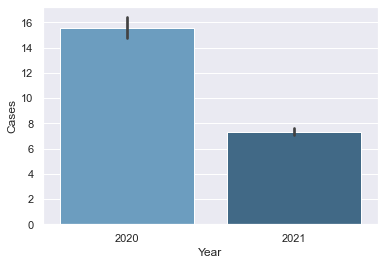

In [471]:
#Cases per year
sns.barplot(x="Year", y="Cases", data=df1,  palette="Blues_d")
plt.show()

NOTE: <br>
Cases in 2021 are less than they were in 2020

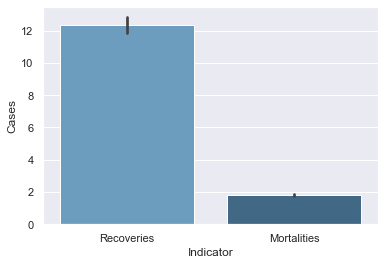

In [472]:
#Cases per indicator
sns.barplot(x="Indicator", y="Cases", data=df1,  palette="Blues_d")
plt.show()

NOTE: <br>
Realistically, the mortalitaies cases less than recovery cases.

In [ ]:
#PLOT Day & Cases

new_x = df1.Day_name
new_y = df1.Cases

plt.bar(new_x,new_y)
plt.xlabel('Day')
plt.ylabel('Cases Counts')
plt.title('Cases per Day', size = 15);

NOTE : <br>
The interpretation for this may be due to the increasing number of meetings at the end of the week.  According to the ministry of health studies, the symptoms of the injured do not appear until after four days

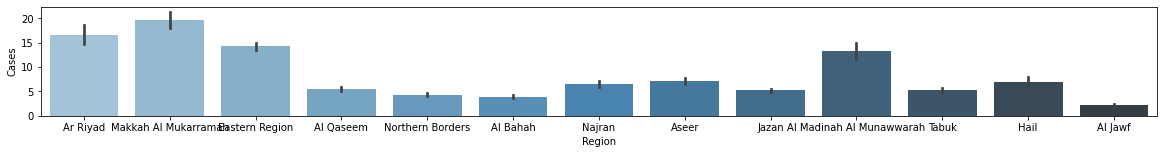

In [108]:
#Cases per region

plt.figure(figsize = [20,2])
sns.barplot(x=df1['Region'], y="Cases", data=df1,  palette="Blues_d")
plt. savefig("output.png")
plt.show()

NOTE: <br>
As shown,Makkah have the most maximum average cases during the two years, then Riyadh, Eeastern, Madinah respectively.

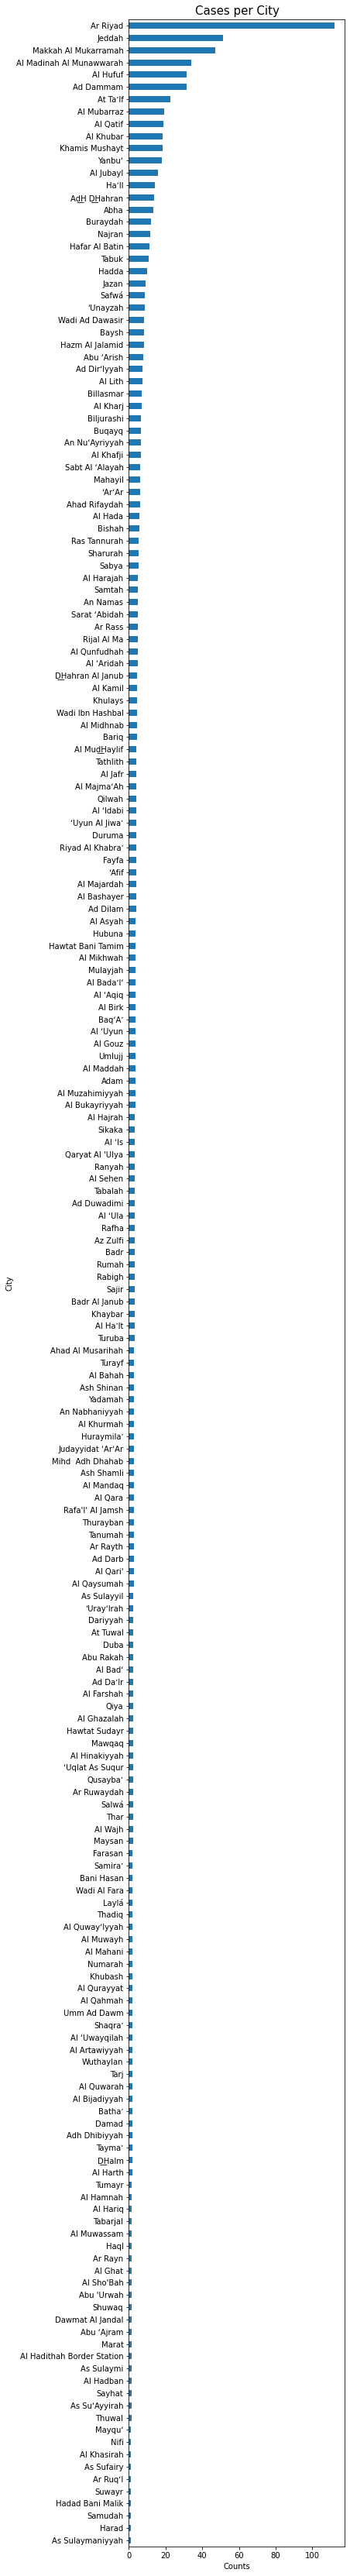

In [105]:
#PLOT average cases per city
cases_per_city = df1.groupby(['City'], sort=False)['Cases'].mean().sort_values()
#cases_per_city
plt.figure(figsize = [5,60])

cases_per_city.plot(kind = 'barh')
plt.xlabel('Counts')
plt.ylabel('City')
plt.title('Cases per City', size = 15);
plt. savefig("output.png")


In [411]:
cases_per_city.plot?

NOTe: <br>
It is noted that in the big cities, cases are increasing, this may be due to the increase in the population, or perhaps the increase in awareness and keenness to go and conduct tests

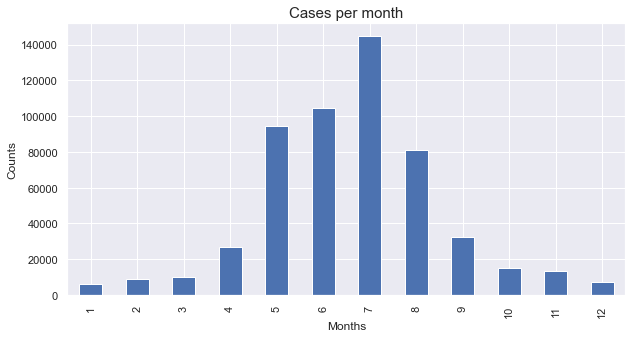

In [387]:
# PLOT cases_per_month
cases_per_month = df1.groupby(['Month'], sort=True)['Cases'].sum()
plt.figure(figsize = [10,5])
cases_per_month.plot(kind = 'bar')
plt.xlabel('Months')
plt.ylabel('Counts')
plt.title('Cases per month', size = 15);

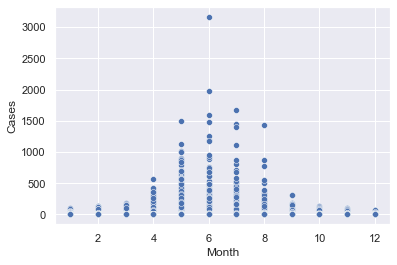

In [385]:
sns.scatterplot(data=df1, x="Month", y="Cases")
plt.show()

NOTE: <br>
It is noticeable that during the holiday, the cases increase

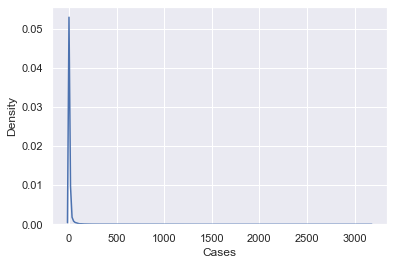

In [386]:
sns.kdeplot(df1['Cases'])
plt.show()

In [388]:
print(df1['Cases'].describe())

count    48292.000000
mean        11.285555
std         47.794051
min          1.000000
25%          1.000000
50%          2.000000
75%          6.000000
max       3165.000000
Name: Cases, dtype: float64


In [48]:
select_r = df1.loc[df1['Cases'] >= 1600]
select_r

,Day_name,Day,Month,Year,Cases,City,Region,Indicator,Event
50495,Sunday,19,7,2020,1676,Ar Riyad,Ar Riyad,Recoveries,No event
148510,Sunday,14,6,2020,1977,Ar Riyad,Ar Riyad,Recoveries,No event
391683,Wednesday,24,6,2020,3165,Ar Riyad,Ar Riyad,Recoveries,No event


## 3. Train Model on Data
- Data Encoading
- Data Splitting (Training/Testing)
- Model Building

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge #ordinary linear regression + w/ ridge regularization
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score, r2_score, mean_squared_error

### a. Data Encoading

* Feature variable (input): Date, City, event ...
* Target variable (Output): Cases

In [50]:
test_df_dailey = df1
test_df_dailey

,Day_name,Day,Month,Year,Cases,City,Region,Indicator,Event
25397,Friday,27,3,2020,2,Ar Riyad,Ar Riyad,Recoveries,No event
25398,Saturday,28,3,2020,2,Ar Riyad,Ar Riyad,Recoveries,No event
25399,Sunday,29,3,2020,25,Makkah Al Mukarramah,Makkah Al Mukarramah,Recoveries,Jeddah lockdown
25400,Tuesday,31,3,2020,1,Al Qatif,Eastern Region,Recoveries,No event
25401,Tuesday,31,3,2020,28,Jeddah,Makkah Al Mukarramah,Recoveries,No event
...,...,...,...,...,...,...,...,...,...
423322,Saturday,15,5,2021,1,Al Madinah Al Munawwarah,Al Madinah Al Munawwarah,Mortalities,No event
423323,Sunday,16,5,2021,1,Khamis Mushayt,Aseer,Mortalities,No event
423324,Sunday,16,5,2021,1,Jeddah,Makkah Al Mukarramah,Mortalities,No event
423325,Sunday,16,5,2021,1,Al Qunfudhah,Makkah Al Mukarramah,Mortalities,No event


In [51]:
Region_dummies = pd.get_dummies(test_df_dailey.Region)
test_merged_df = pd.concat([test_df_dailey,Region_dummies],axis = 'columns')
new_test_df_dailey = test_merged_df.drop(['Day_name','City','Region','Event','Indicator'],axis = 'columns')
new_test_df_dailey

,Day,Month,Year,Cases,Al Bahah,Al Jawf,Al Madinah Al Munawwarah,Al Qaseem,Ar Riyad,Aseer,Eastern Region,Hail,Jazan,Makkah Al Mukarramah,Najran,Northern Borders,Tabuk
25397,27,3,2020,2,0,0,0,0,1,0,0,0,0,0,0,0,0
25398,28,3,2020,2,0,0,0,0,1,0,0,0,0,0,0,0,0
25399,29,3,2020,25,0,0,0,0,0,0,0,0,0,1,0,0,0
25400,31,3,2020,1,0,0,0,0,0,0,1,0,0,0,0,0,0
25401,31,3,2020,28,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423322,15,5,2021,1,0,0,1,0,0,0,0,0,0,0,0,0,0
423323,16,5,2021,1,0,0,0,0,0,1,0,0,0,0,0,0,0
423324,16,5,2021,1,0,0,0,0,0,0,0,0,0,1,0,0,0
423325,16,5,2021,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [133]:
Region_dummies = pd.get_dummies(test_df_dailey.Region)
Indicator_dummies = pd.get_dummies(test_df_dailey.Indicator)
City_dummies = pd.get_dummies(test_df_dailey.City)
Event_dummies =  pd.get_dummies(df_dailey.Event)
Day_dummies = pd.get_dummies(df_dailey.Day_name)
test2_merged_df = pd.concat([test_df_dailey,Region_dummies,Indicator_dummies,City_dummies],axis = 'columns')
new2_test_df_dailey = test2_merged_df.drop(['Day_name','City','Region','Event','Indicator'],axis = 'columns')
new2_test_df_dailey.shape

(48292, 225)

In [200]:
#Indicator_dummies = pd.get_dummies(test_df_dailey.Indicator)
#City_dummies = pd.get_dummies(test_df_dailey.City)
#Event_dummies =  pd.get_dummies(df_dailey.Event)
#Day_dummies = pd.get_dummies(df_dailey.Day_name)

In [52]:
new_test_df_dailey.shape

(48292, 17)

In [135]:
X, y = new2_test_df_dailey.drop('Cases',axis=1), new2_test_df_dailey['Cases']

# 80% training 20% testing
XXX_train, XXX_test, yyy_train, yyy_test= train_test_split(X, y, test_size=.2)

In [136]:
model4 = LogisticRegression()
model4.fit(XXX_train, yyy_train)
model4.score(XXX_test,yyy_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.3679469924422818

In [137]:
model4 = RandomForestClassifier()
model4.fit(XXX_train, yyy_train)
model4.score(XXX_test,yyy_test)

0.3051040480380992

In [138]:
pipe3 = make_pipeline(StandardScaler(), RandomForestClassifier())
pipe3.fit(XXX_train, yyy_train)
pipe3.score(XXX_test, yyy_test)

0.3046899264934258

In [139]:
pipe3 = make_pipeline(StandardScaler(), LogisticRegression())
pipe3.fit(XXX_train, yyy_train)
pipe3.score(XXX_test, yyy_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.36266694274769645

### b. Data Splitting (Training/Testing)

In [53]:
X, y = new_test_df_dailey.drop('Cases',axis=1), new_test_df_dailey['Cases']

# 80% training 20% testing
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=.2)

In [54]:
print ('All data shape' ,df_dailey.shape )
print ('X_train sape :' ,X_train.shape )
print ('y_train sape :' ,y_train.shape )
print ('X_test sape :' ,X_test.shape )
print ('y_test sape :' ,y_test.shape )

All data shape (48292, 9)
X_train sape : (38633, 16)
y_train sape : (38633,)
X_test sape : (9659, 16)
y_test sape : (9659,)


### c. Model Building

In [55]:
## loGISTIC REGRISSION ##
## Before Scaling
model3 = LogisticRegression()
model3.fit(X_train, y_train)
model3.score(X_test,y_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.3627704731338648

In [62]:
##  RANDOMFOREST ## 
## Before Scaling
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier()
model2.fit(X_train, y_train)
model2.score(X_test,y_test)

0.27808261724816236

==================================================================================

In [66]:
#Scale dataset
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipelineX, y = new_test_df_dailey.drop('Cases',axis=1), new_test_df_dailey['Cases']

# 80% training 20% testing
XX_train, XX_test, yy_train, yy_test= train_test_split(X, y, test_size=.2)

## TESTING loGISTIC REGRISSION ##
## After Scaling
pipe = make_pipeline(StandardScaler(),LogisticRegression())
pipe.fit(XX_train, yy_train)
pipe.score(XX_test, yy_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.3645304896987266

In [142]:
## TESTING RANDOMFOREST ## 
## After Scaling
pipe2 = make_pipeline(StandardScaler(), RandomForestClassifier())
pipe2.fit(XX_train, yy_train)
pipe2.score(XX_test, yy_test)

0.27911792110984573

==================================================================================

In [84]:
### Kfold ###
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [85]:
def get_score(model,X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test,y_test)

In [87]:
#RandomForestClassifier ## befor Scaling
get_score (RandomForestClassifier(),X_train, X_test, y_train, y_test )

0.27632260068330056

In [88]:
#RandomForestClassifier ## after Scaling
et_score (RandomForestClassifier(),XX_train, XX_test, yy_train, yy_test)

0.27994616419919244

In [82]:
#LogisticRegression ## befor Scaling
get_score (LogisticRegression(),X_train, X_test, y_train, y_test )

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.3627704731338648

In [86]:
#LogisticRegression ## after Scaling
get_score (LogisticRegression(),XX_train, XX_test, yy_train, yy_test )

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.3645304896987266

## 4. Analysis and Evaluation 
- Evaluation Metrics 
       - recall_score
       - precision_score

In [126]:
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import accuracy_score


y_Prediction = model3.predict(X_test)
print('recall_score :', recall_score(y_test, y_Prediction, average='macro'))
print('precision_score :' , precision_score(y_test, y_Prediction, average='macro')) 
print('f1_score',f1_score(y_test, y_Prediction, average='macro'))
print('Accuracy ', accuracy_score(y_test, y_Prediction, normalize=True))

recall_score : 0.004032258064516129
precision_score : 0.001462784165862358
f1_score 0.0021467799526041957
Accuracy  0.3627704731338648


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_Prediction = model2.predict(X_test)
print('recall_score :', recall_score(y_test, y_Prediction, average='macro'))
print('precision_score :' , precision_score(y_test, y_Prediction, average='macro')) 
print('f1_score',f1_score(y_test, y_Prediction, average='macro'))
print('Accuracy ', accuracy_score(y_test, y_Prediction, normalize=True))

## 5. Conclusion 

This study set out to investigates COVID 19 cases in Saudi Arabia. This study has found that generally emphasize that COVID 19 decreases . The investigation of daily cases has shown that events (such vacation) is factor for increasing COVID-19 cases. However, cases are not monitored every day so this obveiously is affect the prediction.